In [1]:
import pandas as pd
import seaborn as sns
import glob

In [2]:
data_frame_info = []
for name in glob.glob('Output/count*.txt'):
    with open(name , 'r') as f:
        parse = [line for line in f]
        if len(parse) > 3:
            start_time = float(parse[1])
            end_time = float(parse[-1])
            diff = parse[-2].split()[-1]
            data_frame_info.append({"Time" : end_time - start_time , "Difficulty" : diff})

data = pd.DataFrame(data_frame_info)


<AxesSubplot:xlabel='Time', ylabel='Difficulty'>

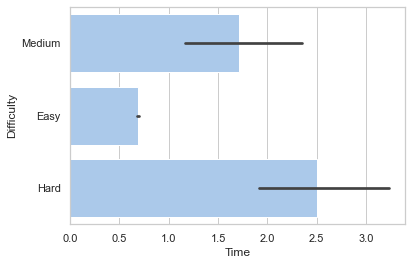

In [3]:
sns.set_theme(style="whitegrid")

# Set up a grid of axes with a polar projection
# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Time", y="Difficulty", data=data,
            label="Sudoku", color="b")
